In [1]:
!pip3 install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


You should consider upgrading via the 'c:\users\mashh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
#!git clone https://github.com/ultralytics/yolov5
!cd yolov5 & pip install -r requirements.txt


You should consider upgrading via the 'c:\users\mashh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Loading the model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\mashh/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-10-4 torch 1.8.2+cpu CPU

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Focus(
        (conv): Conv(
          (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
    

# Making dections

In [ ]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [13]:
img = "assets/traffic.jpg"
results = model(img)
results.print()

image 1/1: 303x397 8 persons, 18 cars, 4 motorcycles, 1 bus, 1 truck
Speed: 55.0ms pre-process, 1214.5ms inference, 38.0ms NMS per image at shape (1, 3, 512, 640)


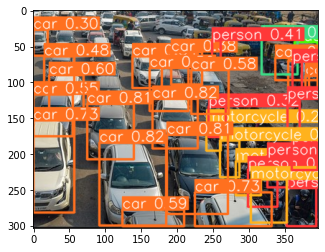

In [14]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()


In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()